<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial101_DL_terminology_training_and_valid_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/SNQEpOdPt5g

**Understanding deep learning terminology**

This code can be used to experiment and explain training and validation curves





**cifar10 dataset**

60,000 32×32 pixel images divided into 10 classes.

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck


#VGG16 info
https://neurohive.io/en/popular-networks/vgg16/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.style.use('classic')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop



In [ ]:
# Input data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("The size of training dataset X is: ", X_train.shape)
print("The size of testing dataset X is: ", X_test.shape)

print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)

The size of training dataset X is:  (50000, 32, 32, 3)
The size of testing dataset X is:  (10000, 32, 32, 3)
The size of training dataset y is:  (50000, 1)
The size of testing dataset y is:  (10000, 1)


In [ ]:
#Decrease the dataset size to see the effect - decrease it to 1000 (test_size=0.1)
from sklearn.model_selection import train_test_split
_, X, _, Y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print("The size of the dataset X is: ", X.shape)
print("The size of the dataset Y is: ", Y.shape)


The size of the dataset X is:  (10000, 32, 32, 3)
The size of the dataset Y is:  (10000, 1)


In [ ]:
#Split again into train and test to create small training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)

The size of training dataset is:  (7500, 32, 32, 3)
The size of testing dataset is:  (2500, 32, 32, 3)
The size of training dataset y is:  (7500, 1)
The size of testing dataset y is:  (2500, 1)


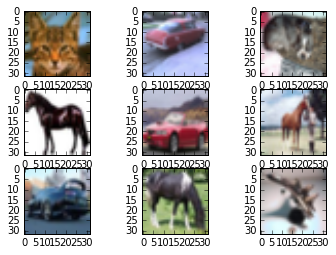

In [ ]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [ ]:
#Scale data
X_train = (X_train.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)

(7500, 10)


In [ ]:
# Create a model with dropout
drop=0.

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application. 
#kernel = he_uniform --> Ideal to work with relu. 
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = RMSprop(lr=0.001, decay=1e-6)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
# Create a deep model with dropout. Change dropout to see overfitting
# Too complicated model. 
drop = 0.
kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform'
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(drop))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(drop))

model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(drop))

model2.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model2.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(drop))

model2.add(Flatten())
model2.add(Dense(1024, activation='relu', kernel_initializer=kernel_initializer))
model2.add(Dropout(drop))
model2.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model2.add(Dropout(drop))
model2.add(Dense(10, activation='softmax'))

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = RMSprop(lr=0.001, decay=1e-6)
model2.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
#########################################################
#Fit model....

history1 = model1.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=1)
history2 = model2.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/25
118/118 [==============================] - 5s 13ms/step - loss: 2.2251 - accuracy: 0.1919 - val_loss: 1.9618 - val_accuracy: 0.2860
Epoch 2/25
118/118 [==============================] - 1s 8ms/step - loss: 1.8878 - accuracy: 0.3265 - val_loss: 1.8313 - val_accuracy: 0.3388
Epoch 3/25
118/118 [==============================] - 1s 8ms/step - loss: 1.7344 - accuracy: 0.3872 - val_loss: 1.7399 - val_accuracy: 0.3792
Epoch 4/25
118/118 [==============================] - 1s 8ms/step - loss: 1.6292 - accuracy: 0.4146 - val_loss: 1.6437 - val_accuracy: 0.4236
Epoch 5/25
118/118 [==============================] - 1s 8ms/step - loss: 1.5310 - accuracy: 0.4471 - val_loss: 1.5662 - val_accuracy: 0.4272
Epoch 6/25
118/118 [==============================] - 1s 8ms/step - loss: 1.4560 - accuracy: 0.4774 - val_loss: 1.5508 - val_accuracy: 0.4360
Epoch 7/25
118/118 [==============================] - 1s 8ms/step - loss: 1.4060 - accuracy: 0.4957 - val_loss: 1.4730 - val_accuracy: 0.4692
Epoch

In [ ]:
_, acc = model1.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

79/79 [==============================] - 0s 3ms/step - loss: 1.5524 - accuracy: 0.5564
Accuracy =  55.640000104904175 %


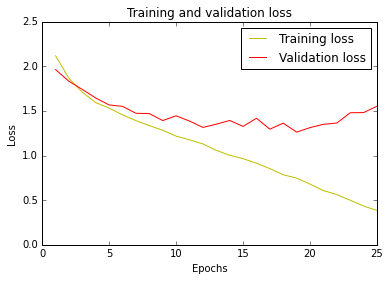

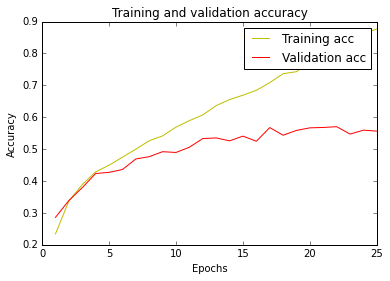

In [ ]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 

history = history1

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




